In [9]:
import pandas as pd
import matplotlib.pyplot as plp
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Read the first dataset and trabsform year to date format
f_birth = pd.read_csv('nigeria-population-2021-04-28.csv', index_col=[0], parse_dates = [0])

In [16]:
# Read the second dataset and trabsform year to date format
base = pd.read_csv('database.csv', index_col=[0], parse_dates = [0])

In [17]:
# ANALYSIS OF OTHER DATASETS COME HERE

In [18]:
#Explore data
base.head(3)

,Population(Nigeria),Birth Rate (per 1000 people)
Year,,
1960-01-01,45138458,46.300
1961-01-01,46063563,46.279
1962-01-01,47029822,46.259


In [7]:
#Get the number of rows
base.shape

(2, 60)

In [14]:
#Importing the csv file.
plt.style.use('bmh')
# df = pd.read_csv("NigeriaRevenue.csv")
df = pd.read_csv('database.csv', sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

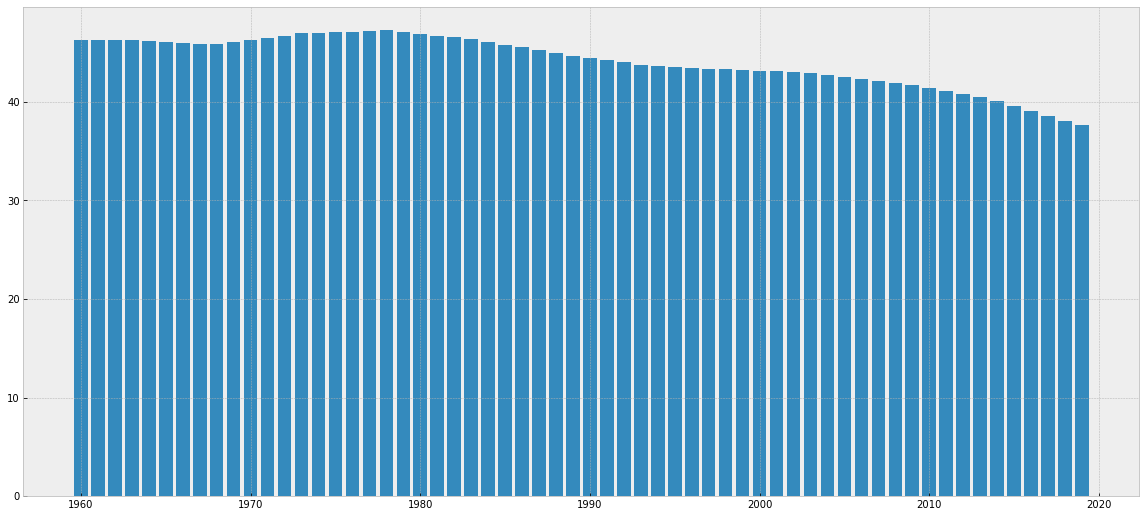

In [19]:
#Plotting the graphs to show how the birth rate trend per 1000 people in nigeria.

#Increasing the size of my graph
fig= plt.figure(figsize=(20,9))

# Setting the values of my x and y axis
x = df['Year']
y = df['Birth Rate (per 1000 people)']

#Plotting the graph with 1 unit to represent 1 child per 100 people
plt.bar(x,y)
plt.show()

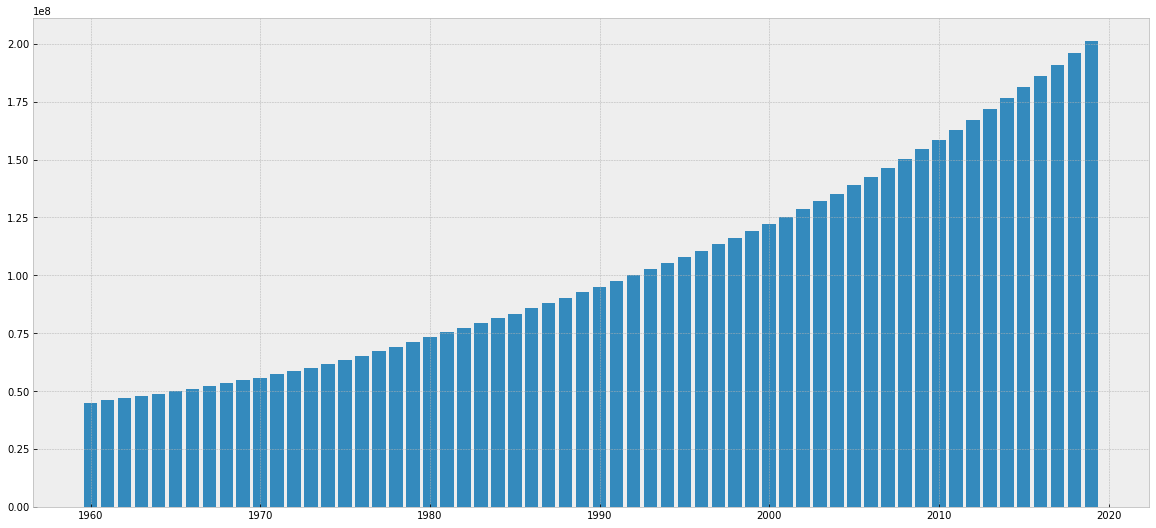

In [20]:
#Plotting the graphs to show how the population trend in nigeria
#Increasing the size of my graph
fig= plt.figure(figsize=(20,9))

# Setting the values of my x and y axis
x = df['Year']
y = df['Population(Nigeria)']

plt.bar(x,y)
plt.show()

In [ ]:
# END OF ANALYSIS

In [ ]:
# BIRTH FORCASTING MODELS START HERE

In [8]:
#Explore data
f_birth.head()

,Births per 1000 People
Year,
1950-01-01,46.007
1951-01-01,46.048
1952-01-01,46.090
1953-01-01,46.132
1954-01-01,46.174


In [10]:
#Check the data type
type(f_birth)

pandas.core.frame.DataFrame

In [147]:
#Get the number of rows
f_birth.shape

(71, 1)

In [13]:
#Converting the data to data 'Series' type in order to do the forcasting
to_series = f_birth.values
to_series

array([[46.007],
       [46.048],
       [46.09 ],
       [46.132],
       [46.174],
       [46.216],
       [46.257],
       [46.299],
       [46.341],
       [46.32 ],
       [46.3  ],
       [46.279],
       [46.259],
       [46.238],
       [46.155],
       [46.071],
       [45.988],
       [45.904],
       [45.821],
       [46.043],
       [46.264],
       [46.486],
       [46.707],
       [46.929],
       [46.991],
       [47.053],
       [47.116],
       [47.178],
       [47.24 ],
       [47.065],
       [46.891],
       [46.716],
       [46.542],
       [46.367],
       [46.079],
       [45.79 ],
       [45.502],
       [45.213],
       [44.925],
       [44.69 ],
       [44.455],
       [44.221],
       [43.986],
       [43.751],
       [43.656],
       [43.561],
       [43.465],
       [43.37 ],
       [43.275],
       [43.211],
       [43.147],
       [43.084],
       [43.02 ],
       [42.956],
       [42.753],
       [42.551],
       [42.348],
       [42.146],
       [41.943

In [14]:
# Checking the type to confirm 
type(to_series)

numpy.ndarray

In [15]:
# Describing the data set
f_birth.describe()

,Births per 1000 People
count,71.000000
mean,44.328423
std,2.626917
min,37.269000
25%,42.988000
50%,45.790000
75%,46.271500
max,47.240000


<AxesSubplot:xlabel='Year'>

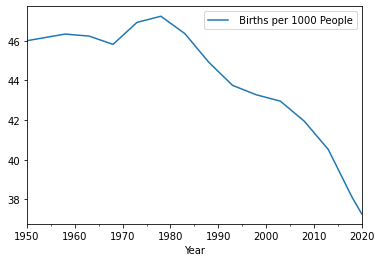

In [16]:
# Plotting the birth chart to see the general trade of births
f_birth.plot()

In [21]:
# FIRST PREDICTION MODEL - The baseline model
value = pd.DataFrame(to_series)
f_brith_df = pd.concat([value,value.shift(1)], axis=1)

In [22]:
f_brith_df.head()

,0,0
0,46.007,NaN
1,46.048,46.007
2,46.090,46.048
3,46.132,46.090
4,46.174,46.132


In [23]:
f_brith_df.columns = ['Actual_Nr_Birth', 'Forecast_Nr_Birth']

In [24]:
f_brith_df.head()

,Actual_Nr_Birth,Forecast_Nr_Birth
0,46.007,NaN
1,46.048,46.007
2,46.090,46.048
3,46.132,46.090
4,46.174,46.132


In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [26]:
# Fixing the forecasting allocation
birth_test = f_brith_df[1:]
birth_test

,Actual_Nr_Birth,Forecast_Nr_Birth
1,46.048,46.007
2,46.090,46.048
3,46.132,46.090
4,46.174,46.132
5,46.216,46.174
...,...,...
66,39.067,39.551
67,38.582,39.067
68,38.098,38.582
69,37.684,38.098


In [28]:
# Show the margin of error 
birth_error = mean_squared_error(birth_test.Actual_Nr_Birth, birth_test.Forecast_Nr_Birth)

In [30]:
# Displaying the error margin - 
np.sqrt(birth_error)

0.21884156042997993

In [31]:
# ARIM - to check how well the current value is correlected with the previous
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

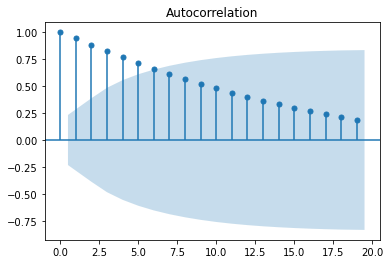

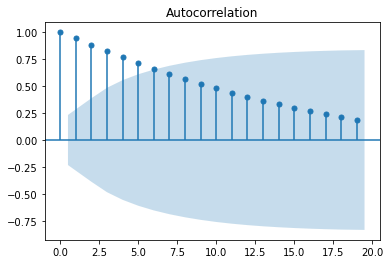

In [36]:
# plot_acf to HELP identifying the parameter Q to use in the formula ARIMA(P,D,Q)
plot_acf(f_birth)

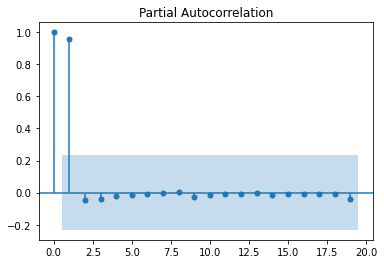

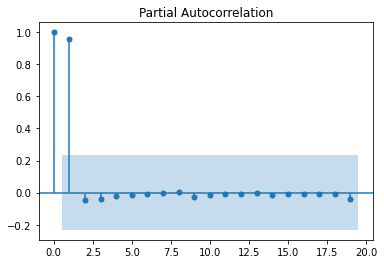

In [37]:
# plot_pacf to identify tparameter P to use in formula ARIMA(p,d,q)
plot_pacf(f_birth)

In [38]:
# q = 5, 6 d=0 p = 0.9
f_birth.size

71

In [88]:
brith_rate_train = f_birth[0:50]
brith_rate_test = f_birth[50:71]


In [89]:
brith_rate_train.size

50

In [90]:
brith_rate_test.size

21

In [91]:
# Import ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [100]:
birth_rate_model = ARIMA(brith_rate_train, order=(1,1,7))

/home/jose/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/jose/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

In [101]:
birth_rate_model_fit = birth_rate_model.fit()

/home/jose/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [102]:
# We need to check the AIC value, WHICH HAS A IMPACT IN THE ERROR Margin: less is better
birth_rate_model_fit.aic

-108.36301033548679

In [103]:
birth_rate_forecast = birth_rate_model_fit.forecast(steps = 21)[0]

In [104]:
birth_rate_forecast

array([43.15411778, 43.10421499, 43.05161235, 42.99791951, 42.94581126,
       42.89477956, 42.84524891, 42.79589526, 42.74667694, 42.6975621 ,
       42.64852639, 42.59955117, 42.55062221, 42.50172861, 42.45286206,
       42.40401619, 42.35518612, 42.30636815, 42.25755942, 42.20875775,
       42.15996149])

In [106]:
np.sqrt(mean_squared_error(brith_rate_test, birth_rate_forecast))

2.3278468642906422

In [ ]:
# the error margin displayed above is a good one, meaning that if we use this model to do the prediction
# a high level of accurency can be expected.

In [ ]:
#SECOND PREDICTION - USING THE LSTM Model

In [118]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import math as math

In [115]:
#Create new data fraim
dataset = f_birth
dataset

,Births per 1000 People
Year,
1950-01-01,46.007
1951-01-01,46.048
1952-01-01,46.090
1953-01-01,46.132
1954-01-01,46.174
...,...
2016-01-01,39.067
2017-01-01,38.582
2018-01-01,38.098


In [130]:
training_data_len = math.ceil(len(dataset) * .8) 

training_data_len

57

In [132]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.87634139],
       [0.88045331],
       [0.88466553],
       [0.88887775],
       [0.89308996],
       [0.89730218],
       [0.9014141 ],
       [0.90562632],
       [0.90983853],
       [0.90773242],
       [0.90572661],
       [0.9036205 ],
       [0.90161468],
       [0.89950857],
       [0.89118443],
       [0.88276   ],
       [0.87443586],
       [0.86601143],
       [0.85768729],
       [0.87995186],
       [0.90211614],
       [0.9243807 ],
       [0.94654498],
       [0.96880955],
       [0.97502758],
       [0.98124561],
       [0.98756394],
       [0.99378197],
       [1.        ],
       [0.9824491 ],
       [0.9649985 ],
       [0.9474476 ],
       [0.92999699],
       [0.91244609],
       [0.88356233],
       [0.85457828],
       [0.82569451],
       [0.79671046],
       [0.7678267 ],
       [0.74425835],
       [0.72069   ],
       [0.69722194],
       [0.6736536 ],
       [0.65008525],
       [0.64055762],
       [0.63102999],
       [0.62140207],
       [0.611

In [133]:
train_data = scaled_data[0:training_data_len, :]
train_data

array([[0.87634139],
       [0.88045331],
       [0.88466553],
       [0.88887775],
       [0.89308996],
       [0.89730218],
       [0.9014141 ],
       [0.90562632],
       [0.90983853],
       [0.90773242],
       [0.90572661],
       [0.9036205 ],
       [0.90161468],
       [0.89950857],
       [0.89118443],
       [0.88276   ],
       [0.87443586],
       [0.86601143],
       [0.85768729],
       [0.87995186],
       [0.90211614],
       [0.9243807 ],
       [0.94654498],
       [0.96880955],
       [0.97502758],
       [0.98124561],
       [0.98756394],
       [0.99378197],
       [1.        ],
       [0.9824491 ],
       [0.9649985 ],
       [0.9474476 ],
       [0.92999699],
       [0.91244609],
       [0.88356233],
       [0.85457828],
       [0.82569451],
       [0.79671046],
       [0.7678267 ],
       [0.74425835],
       [0.72069   ],
       [0.69722194],
       [0.6736536 ],
       [0.65008525],
       [0.64055762],
       [0.63102999],
       [0.62140207],
       [0.611

In [152]:
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(50, len(train_data)):
    x_train.append(train_data[i-50:i, 0])
    y_train.append(train_data[i,0])
    

[array([0.87634139, 0.88045331, 0.88466553, 0.88887775, 0.89308996,
       0.89730218, 0.9014141 , 0.90562632, 0.90983853, 0.90773242,
       0.90572661, 0.9036205 , 0.90161468, 0.89950857, 0.89118443,
       0.88276   , 0.87443586, 0.86601143, 0.85768729, 0.87995186,
       0.90211614, 0.9243807 , 0.94654498, 0.96880955, 0.97502758,
       0.98124561, 0.98756394, 0.99378197, 1.        , 0.9824491 ,
       0.9649985 , 0.9474476 , 0.92999699, 0.91244609, 0.88356233,
       0.85457828, 0.82569451, 0.79671046, 0.7678267 , 0.74425835,
       0.72069   , 0.69722194, 0.6736536 , 0.65008525, 0.64055762,
       0.63102999, 0.62140207, 0.61187444, 0.60234681, 0.59592819])]
[0.5895095777755492]



In [153]:
# Check y trainig set
y_train

[0.5895095777755492,
 0.5831912546384515,
 0.5767726406579086,
 0.5703540266773648,
 0.5499949854578277,
 0.5297362350817374,
 0.5093771938622003]

In [154]:
# Check x training set
x_train

[array([0.87634139, 0.88045331, 0.88466553, 0.88887775, 0.89308996,
        0.89730218, 0.9014141 , 0.90562632, 0.90983853, 0.90773242,
        0.90572661, 0.9036205 , 0.90161468, 0.89950857, 0.89118443,
        0.88276   , 0.87443586, 0.86601143, 0.85768729, 0.87995186,
        0.90211614, 0.9243807 , 0.94654498, 0.96880955, 0.97502758,
        0.98124561, 0.98756394, 0.99378197, 1.        , 0.9824491 ,
        0.9649985 , 0.9474476 , 0.92999699, 0.91244609, 0.88356233,
        0.85457828, 0.82569451, 0.79671046, 0.7678267 , 0.74425835,
        0.72069   , 0.69722194, 0.6736536 , 0.65008525, 0.64055762,
        0.63102999, 0.62140207, 0.61187444, 0.60234681, 0.59592819]),
 array([0.88045331, 0.88466553, 0.88887775, 0.89308996, 0.89730218,
        0.9014141 , 0.90562632, 0.90983853, 0.90773242, 0.90572661,
        0.9036205 , 0.90161468, 0.89950857, 0.89118443, 0.88276   ,
        0.87443586, 0.86601143, 0.85768729, 0.87995186, 0.90211614,
        0.9243807 , 0.94654498, 0.96880955, 0.

In [155]:
#convert the x nd y train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [160]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [161]:
x_train.shape

(7, 50, 1)

In [162]:
#Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [163]:
#Compile the model - to see how well the model is
model.compile(optimizer='adam', loss='mean_squared_error')

In [178]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

7/7 [==============================] - 0s 35ms/step - loss: 0.0104


In [179]:
#create the testing data set
#create new array for scaled values

test_data = scaled_data[training_data_len - 50: , :]

In [171]:
test_data

array([[0.90562632],
       [0.90983853],
       [0.90773242],
       [0.90572661],
       [0.9036205 ],
       [0.90161468],
       [0.89950857],
       [0.89118443],
       [0.88276   ],
       [0.87443586],
       [0.86601143],
       [0.85768729],
       [0.87995186],
       [0.90211614],
       [0.9243807 ],
       [0.94654498],
       [0.96880955],
       [0.97502758],
       [0.98124561],
       [0.98756394],
       [0.99378197],
       [1.        ],
       [0.9824491 ],
       [0.9649985 ],
       [0.9474476 ],
       [0.92999699],
       [0.91244609],
       [0.88356233],
       [0.85457828],
       [0.82569451],
       [0.79671046],
       [0.7678267 ],
       [0.74425835],
       [0.72069   ],
       [0.69722194],
       [0.6736536 ],
       [0.65008525],
       [0.64055762],
       [0.63102999],
       [0.62140207],
       [0.61187444],
       [0.60234681],
       [0.59592819],
       [0.58950958],
       [0.58319125],
       [0.57677264],
       [0.57035403],
       [0.549

In [185]:
from sklearn.impute import SimpleImputer

In [195]:
# Create the data set  x_test and y_test
x_test = []
y_test = dataset.iloc[training_data_len:, : ]
for i in range(50, len(test_data)):
    x_test.append(test_data[i-50:i, 0])
    
x_test

[array([0.90562632, 0.90983853, 0.90773242, 0.90572661, 0.9036205 ,
        0.90161468, 0.89950857, 0.89118443, 0.88276   , 0.87443586,
        0.86601143, 0.85768729, 0.87995186, 0.90211614, 0.9243807 ,
        0.94654498, 0.96880955, 0.97502758, 0.98124561, 0.98756394,
        0.99378197, 1.        , 0.9824491 , 0.9649985 , 0.9474476 ,
        0.92999699, 0.91244609, 0.88356233, 0.85457828, 0.82569451,
        0.79671046, 0.7678267 , 0.74425835, 0.72069   , 0.69722194,
        0.6736536 , 0.65008525, 0.64055762, 0.63102999, 0.62140207,
        0.61187444, 0.60234681, 0.59592819, 0.58950958, 0.58319125,
        0.57677264, 0.57035403, 0.54999499, 0.52973624, 0.50937719]),
 array([0.90983853, 0.90773242, 0.90572661, 0.9036205 , 0.90161468,
        0.89950857, 0.89118443, 0.88276   , 0.87443586, 0.86601143,
        0.85768729, 0.87995186, 0.90211614, 0.9243807 , 0.94654498,
        0.96880955, 0.97502758, 0.98124561, 0.98756394, 0.99378197,
        1.        , 0.9824491 , 0.9649985 , 0.

In [196]:
#convert the data to numpy array
x_test = np.array(x_test)
x_test

array([[0.90562632, 0.90983853, 0.90773242, 0.90572661, 0.9036205 ,
        0.90161468, 0.89950857, 0.89118443, 0.88276   , 0.87443586,
        0.86601143, 0.85768729, 0.87995186, 0.90211614, 0.9243807 ,
        0.94654498, 0.96880955, 0.97502758, 0.98124561, 0.98756394,
        0.99378197, 1.        , 0.9824491 , 0.9649985 , 0.9474476 ,
        0.92999699, 0.91244609, 0.88356233, 0.85457828, 0.82569451,
        0.79671046, 0.7678267 , 0.74425835, 0.72069   , 0.69722194,
        0.6736536 , 0.65008525, 0.64055762, 0.63102999, 0.62140207,
        0.61187444, 0.60234681, 0.59592819, 0.58950958, 0.58319125,
        0.57677264, 0.57035403, 0.54999499, 0.52973624, 0.50937719],
       [0.90983853, 0.90773242, 0.90572661, 0.9036205 , 0.90161468,
        0.89950857, 0.89118443, 0.88276   , 0.87443586, 0.86601143,
        0.85768729, 0.87995186, 0.90211614, 0.9243807 , 0.94654498,
        0.96880955, 0.97502758, 0.98124561, 0.98756394, 0.99378197,
        1.        , 0.9824491 , 0.9649985 , 0.9

In [197]:
#REshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[0.90562632],
        [0.90983853],
        [0.90773242],
        [0.90572661],
        [0.9036205 ],
        [0.90161468],
        [0.89950857],
        [0.89118443],
        [0.88276   ],
        [0.87443586],
        [0.86601143],
        [0.85768729],
        [0.87995186],
        [0.90211614],
        [0.9243807 ],
        [0.94654498],
        [0.96880955],
        [0.97502758],
        [0.98124561],
        [0.98756394],
        [0.99378197],
        [1.        ],
        [0.9824491 ],
        [0.9649985 ],
        [0.9474476 ],
        [0.92999699],
        [0.91244609],
        [0.88356233],
        [0.85457828],
        [0.82569451],
        [0.79671046],
        [0.7678267 ],
        [0.74425835],
        [0.72069   ],
        [0.69722194],
        [0.6736536 ],
        [0.65008525],
        [0.64055762],
        [0.63102999],
        [0.62140207],
        [0.61187444],
        [0.60234681],
        [0.59592819],
        [0.58950958],
        [0.58319125],
        [0

In [198]:
#get the models predicted revenue value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[41.366917],
       [41.306507],
       [41.244194],
       [41.178635],
       [41.10877 ],
       [41.03388 ],
       [40.953503],
       [40.86743 ],
       [40.773483],
       [40.669918],
       [40.55554 ],
       [40.42964 ],
       [40.291977],
       [40.14341 ]], dtype=float32)

In [199]:
# Get the root mean for this prediction
rmse = np.sqrt( np.mean( predictions - y_test ) )
rmse

 Births per 1000 People    0.929739
dtype: float64

<ipython-input-207-166c28cc39bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate['predictions'] = predictions


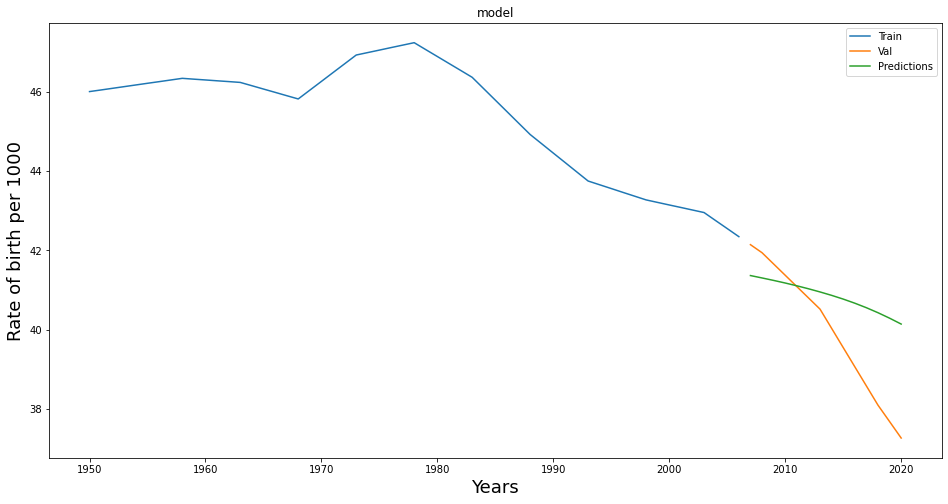

In [207]:
#Plot the data
train = f_birth[:training_data_len]
validate = f_birth[training_data_len:]
validate['predictions'] = predictions
#visualize
plp.figure(figsize=(16,8))
plp.title('model')
plp.xlabel('Years', fontsize=18)
plp.ylabel('Rate of birth per 1000', fontsize=18)
plp.plot(train)
plp.plot(validate)
plp.legend(['Train', 'Actual Value', 'Predictions'])

In [ ]:
# as displayed in the graph about, the direction followed by the predicted and actual value is the same
# this reveals a decent margin error.